<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import *
from PIL import Image, ImageOps
%matplotlib inline


In [6]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [8]:
input_shape = 784

In [9]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  tmp_row = np.asfarray(rows.split(',')[1:])
  tmp_row[tmp_row < 20.0] = 0.0
  X_train.append(tmp_row.reshape([28,28]))
  y_train.append(int(rows.split(',')[0]))

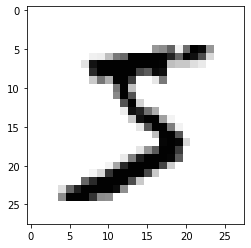

In [10]:
#print(X_train[0])
plt.pyplot.imshow(X_train[0],cmap='Greys',interpolation='None')

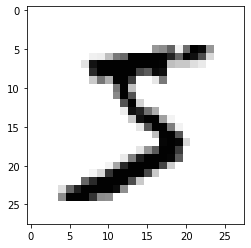

In [11]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 + 0.01#scaling input data to be between 0 and 1
y_train = np.array(y_train)
plt.pyplot.imshow(X_train[0],cmap='Greys',interpolation='None')

In [12]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1) ,padding='same'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),padding='same'))
model.add(Flatten())
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [29]:
print(X_train.shape)

(60000, 28, 28)


In [13]:
model.fit(X_train[...,np.newaxis],y_train,verbose=1,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2012 - accuracy: 0.9368
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0282 - accuracy: 0.9905
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0176 - accuracy: 0.9947
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0151 - accuracy: 0.9950
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0108 - accura

In [14]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [16]:
model.save("//content/gdrive/My Drive/MNIST/trained_model")

INFO:tensorflow:Assets written to: //content/gdrive/My Drive/MNIST/trained_model/assets


In [17]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  tmp_row = np.asfarray(rows.split(',')[1:])
  tmp_row[tmp_row < 20.0] = 0.0
  X_test.append(np.asfarray(tmp_row).reshape([28,28]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 + 0.01 #scaling test data
y_test = np.array(y_test)

In [18]:
#Evaluate the trained model on test data
model.evaluate(X_test[...,np.newaxis],y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9900


[0.04937880113720894, 0.9900000095367432]

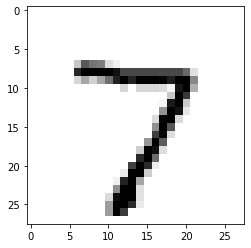

In [19]:
#Check a couple of images and their corresponding labels.
plt.pyplot.imshow(X_test[0],cmap='Greys',interpolation='None')
#print(X_test[1458])

In [20]:
pred_image = X_test[0]
print(pred_image.shape)
#pred_image[np.newaxis,...,np.newaxis]
np.argmax(model.predict(pred_image[np.newaxis,...,np.newaxis]))

(28, 28)


7

In [ ]:
pip install pillow

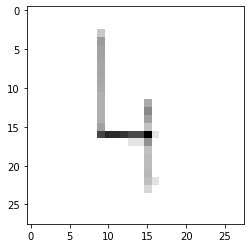

In [77]:
img = Image.open("//content/gdrive/My Drive/MNIST/four.jpg")
img = img.convert("L")
img = np.array(img.resize((28,28)))
img = (255.0 - img) 
img[img < 20.0] = 0
img = img /255.0 * 0.99 + 0.01
#print(img)
plt.pyplot.imshow(img,cmap='Greys',interpolation='None')

In [78]:
np.argmax(model.predict(img[np.newaxis,...,np.newaxis]))
#model.predict(img[np.newaxis,...,np.newaxis])

4